In [7]:
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt

# Fetch data for SET.BK for the last 10 years with daily intervals
ticker = "^SET.BK"


startDate = "2016-06-20"
endDate = "2024-06-20"

# Function to fetch data for a ticker
def fetch_data(ticker, start_date, end_date):
    dft = yf.Ticker(ticker)
    df = dft.history(interval="1d", start=start_date, end=end_date)
    df["Ticker"] = ticker
    return df

df = fetch_data(ticker, startDate, endDate)

data = df

In [9]:
data["RSI"] = ta.rsi(data["Close"], length=14)

# Drop rows with NaN RSI values
rsi_data = data["RSI"].dropna()

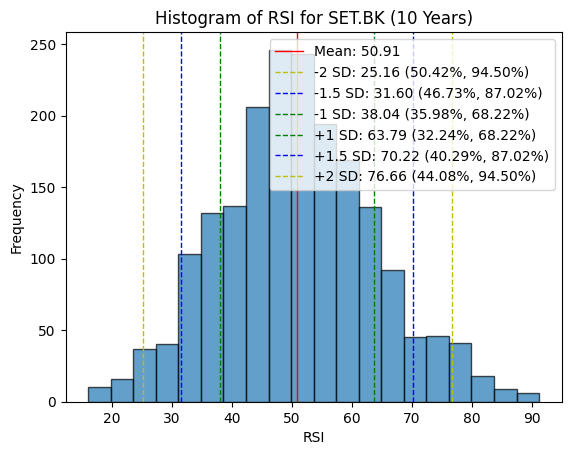

In [15]:
mean = rsi_data.mean()
std = rsi_data.std()

# Calculate cumulative percentages
total_count = len(rsi_data)

within_1sd = (
    ((rsi_data > (mean - std)) & (rsi_data < (mean + std))).sum() / total_count * 100
)

within_1_5sd = (
    ((rsi_data > (mean - 1.5 * std)) & (rsi_data < (mean + 1.5 * std))).sum()
    / total_count
    * 100
)

within_2sd = (
    ((rsi_data > (mean - 2 * std)) & (rsi_data < (mean + 2 * std))).sum()
    / total_count
    * 100
)

# Calculate interval percentages
mean_to_plus_1sd = (
    ((rsi_data > mean) & (rsi_data < (mean + std))).sum() / total_count * 100
)
mean_to_minus_1sd = (
    ((rsi_data < mean) & (rsi_data > (mean - std))).sum() / total_count * 100
)
mean_to_plus_1_5sd = (
    ((rsi_data > mean) & (rsi_data < (mean + 1.5 * std))).sum() / total_count * 100
)
mean_to_minus_1_5sd = (
    ((rsi_data < mean) & (rsi_data > (mean - 1.5 * std))).sum() / total_count * 100
)
mean_to_plus_2sd = (
    ((rsi_data > mean) & (rsi_data < (mean + 2 * std))).sum() / total_count * 100
)
mean_to_minus_2sd = (
    ((rsi_data < mean) & (rsi_data > (mean - 2 * std))).sum() / total_count * 100
)

# Plot histogram of RSI
plt.hist(rsi_data, bins=20, edgecolor="k", alpha=0.7)
plt.title("Histogram of RSI for SET.BK (10 Years)")
plt.xlabel("RSI")
plt.ylabel("Frequency")

# Plot mean and standard deviation lines
plt.axvline(mean, color="r", linestyle="-", linewidth=1, label=f"Mean: {mean:.2f}")

plt.axvline(
    mean - 2 * std,
    color="y",
    linestyle="--",
    linewidth=1,
    label=f"-2 SD: {mean - 2 * std:.2f} ({mean_to_minus_2sd:.2f}%, {within_2sd:.2f}%)",
)

plt.axvline(
    mean - 1.5 * std,
    color="b",
    linestyle="--",
    linewidth=1,
    label=f"-1.5 SD: {mean - 1.5 * std:.2f} ({mean_to_minus_1_5sd:.2f}%, {within_1_5sd:.2f}%)",
)

plt.axvline(
    mean - std,
    color="g",
    linestyle="--",
    linewidth=1,
    label=f"-1 SD: {mean - std:.2f} ({mean_to_minus_1sd:.2f}%, {within_1sd:.2f}%)",
)

plt.axvline(
    mean + std,
    color="g",
    linestyle="--",
    linewidth=1,
    label=f"+1 SD: {mean + std:.2f} ({mean_to_plus_1sd:.2f}%, {within_1sd:.2f}%)",
)

plt.axvline(
    mean + 1.5 * std,
    color="b",
    linestyle="--",
    linewidth=1,
    label=f"+1.5 SD: {mean + 1.5 * std:.2f} ({mean_to_plus_1_5sd:.2f}%, {within_1_5sd:.2f}%)",
)

plt.axvline(
    mean + 2 * std,
    color="y",
    linestyle="--",
    linewidth=1,
    label=f"+2 SD: {mean + 2 * std:.2f} ({mean_to_plus_2sd:.2f}%, {within_2sd:.2f}%)",
)


# Display legend
plt.legend()

plt.show()